In [1]:
!pip3 install pandas matplotlib numpy scikit-surprise

     |████████████████████████████████| 11.8MB 335kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670944 sha256=e72624cb388f21b3bd7dd032482dd9e13b7b294f3353a8f7b331ed85676fa424
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [2]:
import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [3]:
df = pd.read_csv ("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
n_movies = df["movieId"].nunique() 
n_users = df["userId"].nunique() 

print(f'Number of movies: {n_movies}')
print(f'Number of users: {n_users}')

Number of movies: 9724
Number of users: 610


In [6]:
available_ratings = df['rating'].count()
total_ratings = n_movies * n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings)*100
print(available_ratings, total_ratings, missing_ratings)
print(f'{sparsity}%')

100836 5931640 5830804
98.30003169443864%


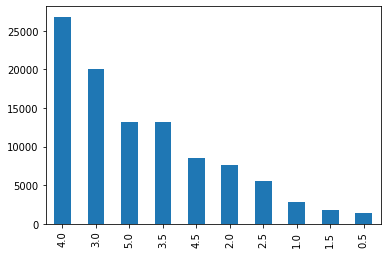

In [7]:
df['rating'].value_counts().plot(kind='bar')

In [8]:
min_ratings = 3
filter_movies = df['movieId'].value_counts() > min_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

In [9]:
min_user_ratings = 3
filter_users = df['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

In [10]:
print('The original data frame shape:\t{}'.format(df.shape))
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print('The new data frame shape:\t{}'.format(df.shape))

The original data frame shape:	(100836, 3)
The new data frame shape:	(92394, 3)


In [11]:
cols = ['userId', 'movieId', 'rating']

In [12]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

In [13]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [14]:
algo = SVD(n_epochs = 25, verbose = True)

In [15]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)
print('Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [16]:
predictions = algo.test(antiset)

from collections import defaultdict
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 58559, 720]
2 [2571, 1136, 3275]
3 [933, 1235, 1267]
4 [1272, 2067, 913]
5 [5618, 898, 720]
6 [5008, 1248, 4011]
7 [858, 898, 1262]
8 [2324, 1242, 1208]
9 [898, 912, 1104]
10 [720, 54001, 96588]
11 [527, 1198, 1104]
12 [1, 260, 356]
13 [318, 1221, 2329]
14 [3435, 898, 2160]
15 [750, 778, 1248]
16 [2324, 1217, 898]
17 [92259, 3030, 7361]
18 [1104, 3030, 1204]
19 [858, 1283, 318]
20 [912, 898, 1203]
21 [1035, 3037, 112552]
22 [2858, 898, 3535]
23 [898, 1288, 1104]
24 [3435, 1237, 904]
25 [50, 608, 1089]
26 [1219, 1223, 111]
27 [318, 4011, 2571]
28 [3435, 1228, 2160]
29 [898, 3030, 1248]
30 [1208, 1222, 1704]
31 [7361, 72226, 1250]
32 [2571, 1210, 1221]
33 [750, 1261, 1262]
34 [58559, 1223, 6377]
35 [527, 1617, 2959]
36 [55820, 1219, 1276]
37 [1210, 50, 1204]
38 [48516, 1197, 308]
39 [778, 1204, 72226]
40 [7361, 527, 3147]
41 [912, 904, 475]
42 [1732, 1193, 111]
43 [6, 50, 260]
44 [2571, 7153, 2959]
45 [58559, 904, 293]
46 [527, 3147, 1227]
47 [1262, 1248, 1237]
48 [2160, 318, 296